In [49]:
import pandas as pd
import plotly.express as px
import plotly as py
import numpy as np

In [50]:
df = pd.read_csv("data_viz_species_data.csv")
df["count"] = 1
df_count = df.groupby(["FAMILY"]).count()
df_count = df_count[["count"]]
df_count = df_count.reset_index()
df_count = df_count.sort_values("count",ascending=False)
df_top_5 = df_count.head()

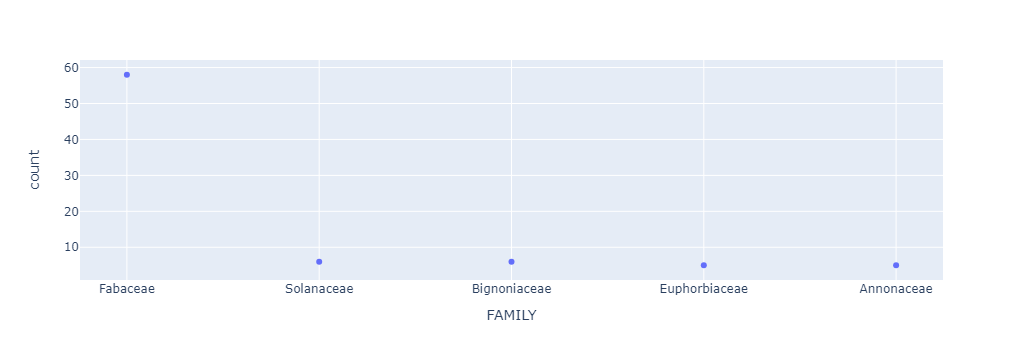

'./PlotTop5.html'

In [51]:
fig = px.scatter(df_top_5, x="FAMILY", y="count")
fig.show()
py.offline.plot(fig, filename='./PlotTop5.html')

In [78]:
ls_cb = df["CO BENEFITS"].unique()
ls_cb_dup = []
for cb in ls_cb:
    if str(cb) != "nan":
        for el in cb.split(","):
            ls_cb_dup.append(el)
df_cb = pd.DataFrame({"cobenefits": ls_cb_dup})
df_cb["count"] = 1
df_count_cb = df_cb.groupby(["cobenefits"]).count()
df_count_cb = df_count_cb[["count"]]
df_count_cb = df_count_cb.reset_index()
df_count_cb = df_count_cb.sort_values("count",ascending=False)
df_top_10_cb = df_count_cb.head(10)
df_top_10_cb

,cobenefits,count
16,Medicinal,26
9,Food,15
26,Wood,15
14,Material,8
1,Biodiversity,8
18,Ornamental,6
15,Material (with fruit),5
19,Patrimonial,4
13,Manure,4
21,Shade,3


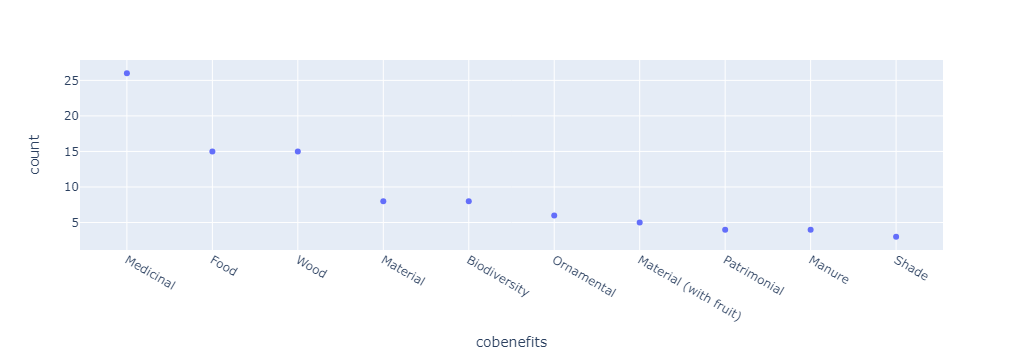

'./PlotTop10CBs.html'

In [80]:
fig = px.scatter(df_top_10_cb, x="cobenefits", y="count")
fig.show()
py.offline.plot(fig, filename='./PlotTop10CBs.html')

In [100]:
df_stats = df[["SIZE","DIAMETER","SEEDS/KG"]]
def mean_interval(interval):
    interval = str(interval)
    ls = interval.split("-")
    if len(ls) == 1 :
        return float(ls[0])
    return (float(ls[1])-float(ls[0]))/2
df_stats = df_stats.dropna()
df_stats = df_stats.iloc[1:]

df_stats_size = df_stats["SIZE"].apply(mean_interval)
df_stats_d = df_stats["DIAMETER"].apply(mean_interval)
df_stats_skd = df_stats["SEEDS/KG"].apply(mean_interval)
print(df_stats_size.mean())
print(df_stats_d.mean())
print(df_stats_skd.mean())

5.673684210526315
19.88157894736842
94504.21052631579
